In [275]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [276]:
df = pd.read_excel(r'/Users/julianwere/Documents/Arrests Data/arrests-data.xlsx', index_col = False)

In [277]:
path = r'/Users/julianwere/Documents/Arrests Data'

In [278]:
df.head()

,Measure,Year,Ethnicity,Gender,Age_Group,Geography,Geography_type,Number of arrests,"Population by ethnicity, gender, and PFA (based on 2011 Census)","Rate per 1,000 population by ethnicity, gender, and PFA","Proportion of arrests of this ethnicity, in this year, of this gender and in this police force area (excludes unreported)"
0,Number of arrests,2018/19,All,Female,All,All,Police Force Area,97117.0,27760111,3.50,1.000
1,Number of arrests,2018/19,All,Male,All,All,Police Force Area,574009.0,26854908,21.37,1.000
2,Number of arrests,2018/19,All,All,All,All,Police Force Area,671126.0,54615019,12.29,1.000
3,Number of arrests,2018/19,Any other asian,Female,All,All,Police Force Area,966.0,424764,2.27,0.011
4,Number of arrests,2018/19,Any other asian,Male,All,All,Police Force Area,11721.0,403496,29.05,0.023


In [279]:
df.shape

(17052, 11)

In [131]:
# create df with only number columns for nsupervised Machine learning

In [280]:
df1 = df[['Number of arrests','Population by ethnicity, gender, and PFA (based on 2011 Census)','Rate per 1,000 population by ethnicity, gender, and PFA','Proportion of arrests of this ethnicity, in this year, of this gender and in this police force area (excludes unreported)']]

In [281]:
df1.head()

,Number of arrests,"Population by ethnicity, gender, and PFA (based on 2011 Census)","Rate per 1,000 population by ethnicity, gender, and PFA","Proportion of arrests of this ethnicity, in this year, of this gender and in this police force area (excludes unreported)"
0,97117.0,27760111,3.50,1.000
1,574009.0,26854908,21.37,1.000
2,671126.0,54615019,12.29,1.000
3,966.0,424764,2.27,0.011
4,11721.0,403496,29.05,0.023


In [134]:
#rename of columns

In [282]:
df.rename(columns = {'Population by ethnicity, gender, and PFA (based on 2011 Census)': 'Pop, by ethnicity and gender', 'Rate per 1,000 population by ethnicity, gender, and PFA':'Rate per 1,000 of pop' ,'Proportion of arrests of this ethnicity, in this year, of this gender and in this police force area (excludes unreported)':'Proportion of arrests of this ethnicity'}, inplace = True)

In [283]:
df.head()

,Measure,Year,Ethnicity,Gender,Age_Group,Geography,Geography_type,Number of arrests,"Pop, by ethnicity and gender","Rate per 1,000 of pop",Proportion of arrests of this ethnicity
0,Number of arrests,2018/19,All,Female,All,All,Police Force Area,97117.0,27760111,3.50,1.000
1,Number of arrests,2018/19,All,Male,All,All,Police Force Area,574009.0,26854908,21.37,1.000
2,Number of arrests,2018/19,All,All,All,All,Police Force Area,671126.0,54615019,12.29,1.000
3,Number of arrests,2018/19,Any other asian,Female,All,All,Police Force Area,966.0,424764,2.27,0.011
4,Number of arrests,2018/19,Any other asian,Male,All,All,Police Force Area,11721.0,403496,29.05,0.023


# data consitency checks

In [256]:
#missing values

In [257]:
df1.isnull().sum()

Number of arrests               0
Pop, by ethnicity and gender    0
Rate per 1,000 of pop           0
Proportion of arrests           0
clusters                        0
cluster                         0
dtype: int64

In [258]:
df1.dropna(inplace = True)

/Users/julianwere/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [259]:
df1.isnull().sum()

Number of arrests               0
Pop, by ethnicity and gender    0
Rate per 1,000 of pop           0
Proportion of arrests           0
clusters                        0
cluster                         0
dtype: int64

In [260]:
#duplicates check

In [261]:
dups = df.duplicated()

In [262]:
dups.shape 

(17052,)

In [263]:
#no dups

# Q3. The Elbow Technique

In [253]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [172]:
score = [kmeans[i].fit(df1).score(df1) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-6.823777196940618e+16,
 -1.0439467899501428e+16,
 -3130348254688960.0,
 -1623450273064814.0,
 -1127137873089521.0,
 -773786834582859.2,
 -506278001074780.0,
 -331284361689462.9,
 -248511751525908.53]

In [ ]:
#elbow curve

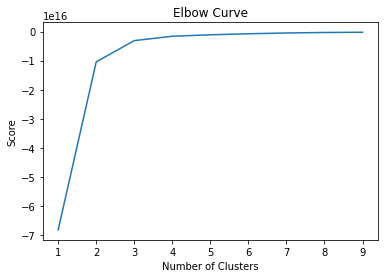

In [173]:
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# Q4 - I'll be exploring 'number of arrests' against 'population and gender' based on the relationship from previous tasks. I' also explore 'number of arrests against a specific prop or arrests of a specific ethnicity'. 

# Q5. K-Means Clustering 

In [174]:
kmeans = KMeans(n_clusters = 3, n_jobs = -1) 

In [148]:
kmeans.fit(df1)

/Users/julianwere/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [247]:
df1['clusters'] = kmeans.fit_predict(df1)

/Users/julianwere/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/var/folders/31/7d4dby496tv4kmld3fn_5cm40000gn/T/ipykernel_53039/865444660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['clusters'] = kmeans.fit_predict(df1)


In [248]:
df1.head()

,Number of arrests,"Pop, by ethnicity and gender","Rate per 1,000 of pop",Proportion of arrests,clusters
0,97117.0,27760111,3.50,1.000,1
1,574009.0,26854908,21.37,1.000,1
2,671126.0,54615019,12.29,1.000,2
3,966.0,424764,2.27,0.011,0
4,11721.0,403496,29.05,0.023,0


In [249]:
df1['clusters'].value_counts()

0    16251
1       36
2       18
Name: clusters, dtype: int64

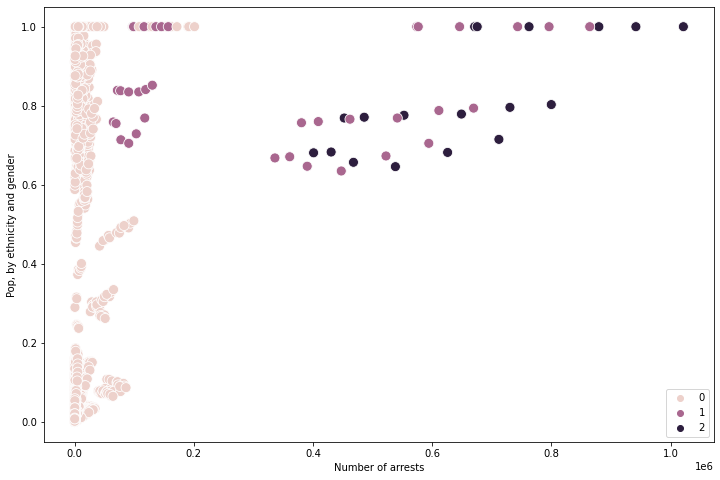

In [250]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['Number of arrests'], y=df1['Proportion of arrests'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of arrests') # Label x-axis.
plt.ylabel('Pop, by ethnicity and gender') # Label y-axis.
plt.show()

In [251]:
df1.loc[df1['clusters'] == 2, 'cluster'] = 'dark purple'
df1.loc[df1['clusters'] == 1, 'cluster'] = 'purple'
df1.loc[df1['clusters'] == 0, 'cluster'] = 'pink'

/Users/julianwere/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/julianwere/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [252]:
df1.groupby('cluster').agg({'Number of arrests':['mean', 'median'], 
                         'Pop, by ethnicity and gender':['mean', 'median'], 
                         'Rate per 1,000 of pop':['mean', 'median'],
                          'Proportion of arrests':['mean', 'median']})

Number of arrests           Pop, by ethnicity and gender  \
                         mean    median                         mean   
cluster                                                                
dark purple     655359.611111  660052.5                 4.935528e+07   
pink              2043.124608      86.0                 1.360600e+05   
purple          327679.805556  246579.0                 2.467764e+07   

                        Rate per 1,000 of pop         Proportion of arrests  \
                 median                  mean  median                  mean   
cluster                                                                       
dark purple  48209395.0             13.138333  12.915              0.819889   
pink             5216.0             26.316514  14.550              0.137705   
purple       23768108.5             13.303056  10.555              0.836222   

                     
             median  
cluster              
dark purple  0.7775  
pink         0.0110  
purple       0.8145

In [ ]:
df.to_csv(os.path.join(path, 'arrests-data1.csv'))